In [215]:
import numpy as np 
from scipy import fftpack 
import pandas as pd
from matplotlib import pyplot as plt
import math 
from array import *

In [216]:
data =  pd.read_excel (r'F:\Data for US pulses\Two Pulses for castor oil in different sample cell 10mm and 25mm.xlsx')
print(data)

       Time  First pulse for SC-10 mm  Second pulse for SC-25 mm
0      4.00                   0.08984                    0.07422
1      4.01                   0.08203                    0.10156
2      4.02                   0.08203                    0.09375
3      4.03                   0.09766                    0.09766
4      4.04                   0.06641                    0.06641
5      4.05                   0.11719                    0.10156
6      4.06                   0.11719                    0.10156
7      4.07                   0.09375                    0.10156
8      4.08                   0.10156                    0.11719
9      4.09                   0.06641                    0.09375
10     4.10                   0.10156                    0.06250
11     4.11                   0.10156                    0.06641
12     4.12                   0.07813                    0.08594
13     4.13                   0.08203                    0.08203
14     4.14              

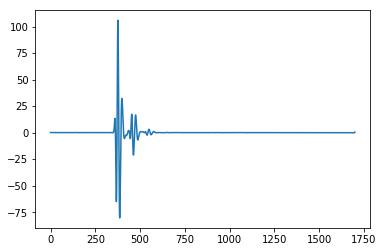

In [217]:
Before= data['First pulse for SC-10 mm']
plt.plot(Before)
plt.show()

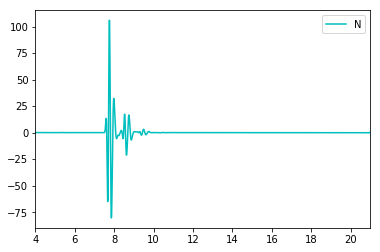

In [218]:
dt = 0.01
t = np.arange(4,21,dt)
f = Before
plt.plot(t,f,color='c',LineWidth=1.5,label='N')
plt.xlim(t[0],t[-1])
plt.legend()


[[1.66629692+0.j 0.54691724+0.j 0.12523422+0.j ... 0.10556398+0.j
  0.12523422+0.j 0.54691724+0.j]]


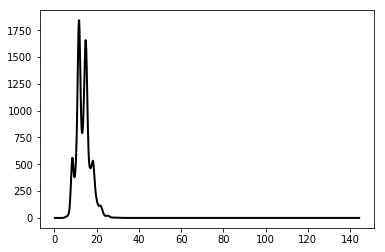

In [219]:
#Fast Fourier transform (FFT)
n = len(t)
fhat = np.fft.fft(f,n) #compute the FFT
PSD = fhat * np.conj(fhat)/n            #Power spectrum densoty
freq = (1/dt*n*10**-6)*np.arange(n)           #creat x-axis of freq

L = np.arange(1,np.floor(n/2),dtype='int') 
z = np.array([PSD])
print(z)


plt.plot(freq[L],PSD[L],color='k',LineWidth=2,label='C')

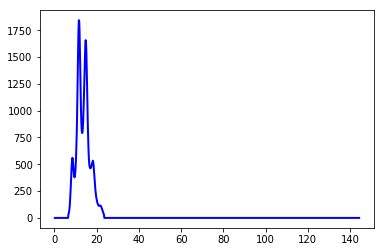

In [220]:
# By using PSD data, we can fillter out the noise 

indices = PSD>30
PSDclean = indices * PSD
fhat = indices*fhat
ifftt = np.fft.ifft(fhat)

plt.plot(freq[L],PSDclean[L],color='b',LineWidth=2,label='C')

print(x)
plt.show()

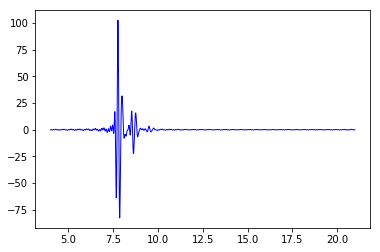

In [221]:
plt.plot(t,ifftt,color='b',LineWidth=1,label='C')

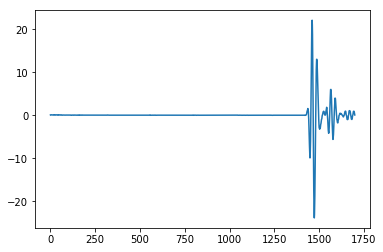

In [222]:
##Second pules
Second_P = data['Second pulse for SC-25 mm']
plt.plot(Second_P)
plt.show()


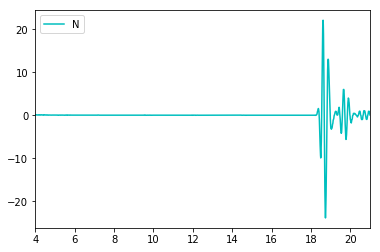

In [223]:
dt = 0.01
t = np.arange(4,21,dt)
f = Second_P
plt.plot(t,f,color='c',LineWidth=1.5,label='N')
plt.xlim(t[0],t[-1])
plt.legend()

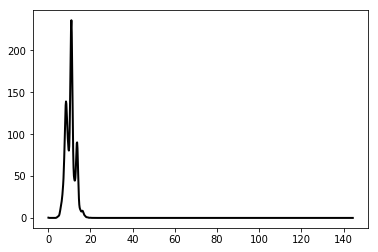

In [224]:
n = len(t)
fhat_Second = np.fft.fft(f,n) #compute the FFT
PSD_Second = fhat_Second * np.conj(fhat_Second)/n            #Power spectrum densoty
freq_Second = (1/dt*n*10**-6)*np.arange(n)           #creat x-axis of freq

L = np.arange(1,np.floor(n/2),dtype='int')   
q = np.array(PSD_Second)
y = np.vectorize(PSD_Second)
plt.plot(freq_Second[L],PSD_Second[L],color='k',LineWidth=2,label='C')
print(y)

[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]


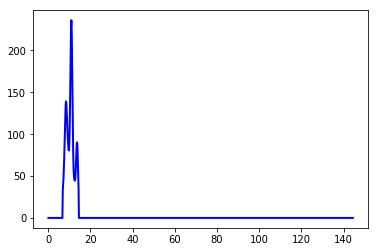

In [225]:
# By using PSD, we can fillter out the noise 

indices_Second = PSD_Second>30
PSDclean_Second = indices_Second * PSD_Second
fhat_Second = indices_Second*fhat_Second
ifftt_Second = np.fft.ifft(fhat_Second)

plt.plot(freq_Second[L],PSDclean_Second[L],color='b',LineWidth=2,label='C')

print(PSDclean_Second)


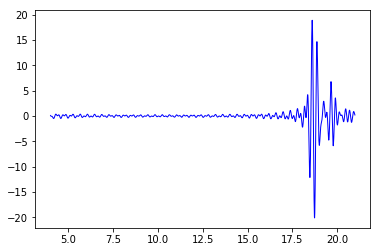

In [226]:
plt.plot(t,ifftt_Second,color='b',LineWidth=1,label='C')

In [227]:
alpha = -(np.log((abs((PSDclean_Second/PSDclean)))))/1.5

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [228]:
print(alpha)
print(freq_Second)

[nan nan nan ... nan nan nan]
[0.0000e+00 1.7000e-01 3.4000e-01 ... 2.8849e+02 2.8866e+02 2.8883e+02]


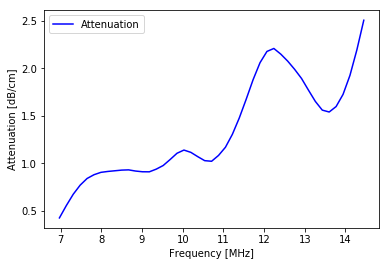

In [229]:
plt.plot(freq_Second[L],alpha[L],color='b',label='Attenuation')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Attenuation [dB/cm]')
plt.legend()
plt.show()

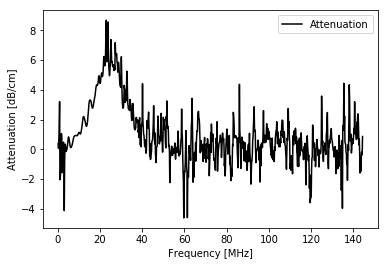

In [230]:
alpha2 = -(np.log((abs((PSD_Second/PSD)))))/1.5
plt.plot(freq_Second[L],alpha2[L],color='k',label='Attenuation')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Attenuation [dB/cm]')
plt.legend()
plt.show()